# Working Notebook for Clustering Project

By: David Schneemann

In [12]:
# regular imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math
import env

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import warnings
warnings.filterwarnings("ignore")

# Wrangling
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.cluster import KMeans

# Personal Imports
import acquire
import prepare
import explore
import model

## Acquire

In [13]:
df = acquire.wrangle_zillow()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        76 non-null     float64
 1   heatingorsystemtypeid         33935 non-null  float64
 2   buildingclasstypeid           0 non-null      object 
 3   architecturalstyletypeid      70 non-null     float64
 4   airconditioningtypeid         13638 non-null  float64
 5   propertylandusetypeid         52441 non-null  float64
 6   id                            52441 non-null  int64  
 7   parcelid                      52441 non-null  int64  
 8   logerror                      52441 non-null  float64
 9   transactiondate               52441 non-null  object 
 10  id                            52441 non-null  int64  
 11  parcelid                      52441 non-null  int64  
 12  basementsqft                  47 non-null     float64
 13  b

In [14]:
df.head()

,typeconstructiontypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,propertylandusetypeid,id,parcelid,logerror,transactiondate,...,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,propertylandusedesc,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,typeconstructiondesc
0,NaN,NaN,None,NaN,NaN,261.00,0,14297519,0.03,2017-01-01,...,"11,013.72",None,NaN,"60,590,630,072,012.00",Single Family Residential,None,None,None,None,None
1,NaN,NaN,None,NaN,NaN,261.00,1,17052889,0.06,2017-01-01,...,"5,672.48",None,NaN,"61,110,010,023,006.00",Single Family Residential,None,None,None,None,None
2,NaN,NaN,None,NaN,NaN,261.00,2,14186244,0.01,2017-01-01,...,"6,488.30",None,NaN,"60,590,218,022,012.00",Single Family Residential,None,None,None,None,None
3,NaN,2.00,None,NaN,NaN,261.00,3,12177905,-0.10,2017-01-01,...,"1,777.51",None,NaN,"60,373,001,001,006.00",Single Family Residential,None,None,None,Central,None
4,NaN,2.00,None,NaN,1.00,261.00,6,12095076,-0.00,2017-01-01,...,"9,516.26",None,NaN,"60,374,608,001,014.00",Single Family Residential,Central,None,None,Central,None


## Prepare

In [15]:
df, train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = prepare.prep_zillow(df)

In [16]:
print(df.shape)
print(train.shape)
print(validate.shape)
print(test.shape)

(48266, 32)
(27028, 32)
(11584, 32)
(9654, 32)


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27028 entries, 14875 to 20163
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   logerror                    27028 non-null  float64 
 1   transactiondate             27028 non-null  object  
 2   bathrooms                   27028 non-null  float64 
 3   bedrooms                    27028 non-null  int64   
 4   sq_ft                       27028 non-null  int64   
 5   finishedsquarefeet12        27028 non-null  float64 
 6   location                    27028 non-null  object  
 7   full_bathrooms              27028 non-null  float64 
 8   garage_spaces               27028 non-null  float64 
 9   garagetotalsqft             27028 non-null  float64 
 10  latitude                    27028 non-null  float64 
 11  longitude                   27028 non-null  float64 
 12  lot_sq_ft                   27028 non-null  float64 
 13  poolcnt     

### Additional Clean and Prep

## Main Exploration

In [18]:
train.loc[:, train.columns!='census_quarter_bin']

,logerror,transactiondate,bathrooms,bedrooms,sq_ft,finishedsquarefeet12,location,full_bathrooms,garage_spaces,garagetotalsqft,...,home_value,landtaxvaluedollarcnt,censustractandblock,decade_built,county_encoded,age,censustract_bin,bath_bed_ratio,census_county_bin,age_bin
14875,0.08,2017-03-31,2.00,3,1185,"1,185.00",LA County,2.00,0.00,0.00,...,585000,"425,000.00","60,375,545,111,019.00",70s,0,46,0,0.67,LA,0.33
11357,-0.06,2017-03-14,2.00,2,1494,"1,494.00",LA County,2.00,0.00,0.00,...,311846,"168,588.00","60,374,061,011,000.00",50s,0,67,0,1.00,LA,0.47
20714,-0.10,2017-04-28,2.00,4,1120,"1,120.00",LA County,2.00,0.00,0.00,...,261781,"119,139.00","60,372,400,201,005.00",2000s,0,14,0,0.50,LA,0.13
37077,0.00,2017-07-07,2.50,4,1667,"1,667.00",Orange County,2.00,2.00,531.00,...,633000,"493,028.00","60,590,015,031,037.00",70s,1,47,1,0.62,Orange,0.33
14313,0.01,2017-03-29,2.00,2,1104,"1,104.00",Ventura County,2.00,2.00,0.00,...,615000,"541,000.00","61,110,052,022,015.00",60s,2,57,2,1.00,Ventura,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48757,-0.00,2017-08-31,1.00,5,1472,"1,472.00",LA County,1.00,0.00,0.00,...,717618,"480,415.00","60,371,957,101,004.00",1900s,0,117,0,0.20,LA,0.80
24068,-0.00,2017-05-12,3.00,4,1801,"1,801.00",LA County,3.00,0.00,0.00,...,115775,"29,125.00","60,379,006,081,009.00",80s,0,29,0,0.75,LA,0.20
35448,0.14,2017-06-30,2.50,3,3159,"3,159.00",Ventura County,2.00,3.00,727.00,...,1034497,"672,579.00","61,110,058,022,011.00",2000s,2,14,2,0.83,Ventura,0.13
28625,0.01,2017-06-01,2.00,3,1323,"1,323.00",LA County,2.00,0.00,0.00,...,71920,"30,210.00","60,374,057,021,013.00",50s,0,62,0,0.67,LA,0.47


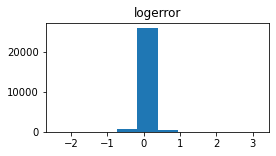

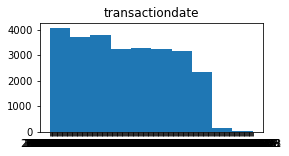

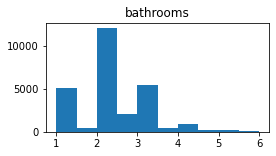

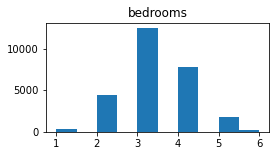

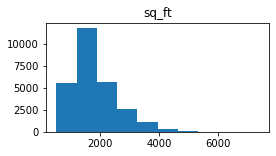

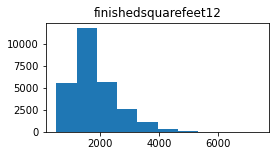

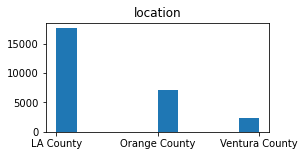

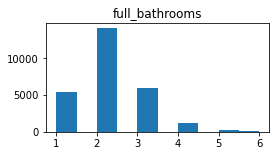

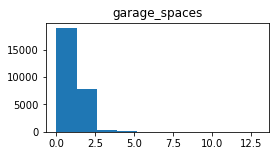

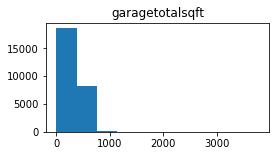

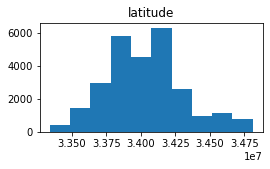

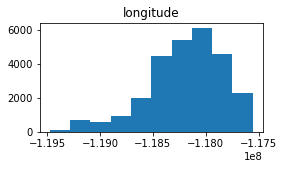

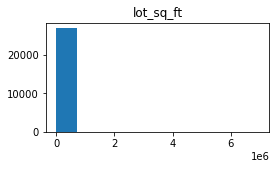

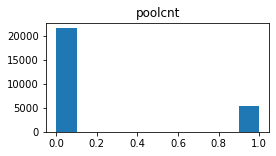

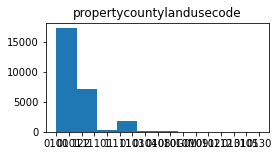

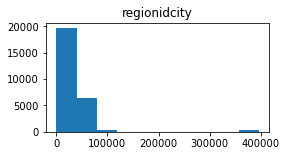

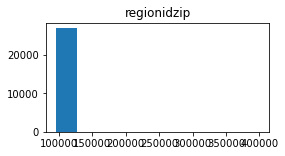

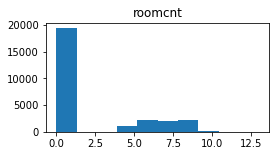

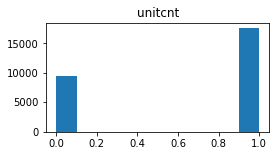

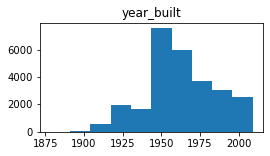

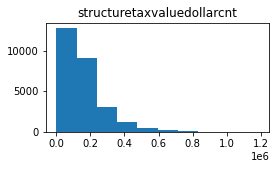

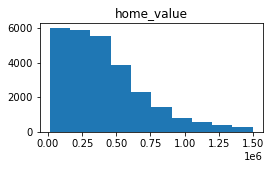

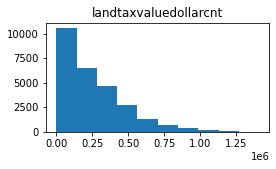

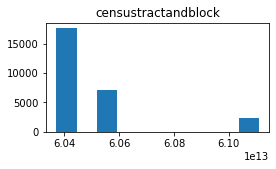

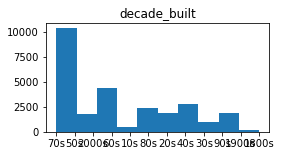

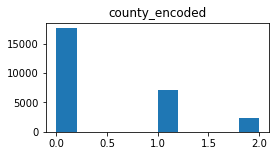

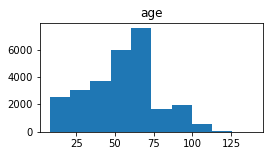

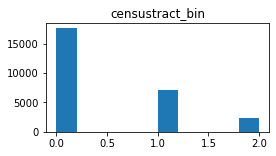

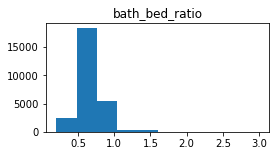

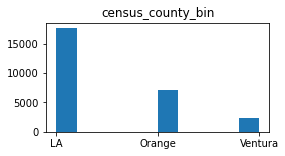

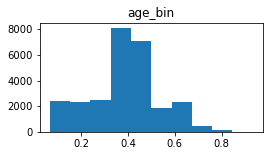

In [19]:
train1 = train.loc[:, train.columns!='census_quarter_bin']

# loop for distribution of all variables, via histogram:
for col in train1.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train1[col])
    plt.title(col)
    plt.show()

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27028 entries, 14875 to 20163
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   logerror                    27028 non-null  float64 
 1   transactiondate             27028 non-null  object  
 2   bathrooms                   27028 non-null  float64 
 3   bedrooms                    27028 non-null  int64   
 4   sq_ft                       27028 non-null  int64   
 5   finishedsquarefeet12        27028 non-null  float64 
 6   location                    27028 non-null  object  
 7   full_bathrooms              27028 non-null  float64 
 8   garage_spaces               27028 non-null  float64 
 9   garagetotalsqft             27028 non-null  float64 
 10  latitude                    27028 non-null  float64 
 11  longitude                   27028 non-null  float64 
 12  lot_sq_ft                   27028 non-null  float64 
 13  poolcnt     

In [21]:
train_explore = train.drop(['decade_built','location','transactiondate','propertycountylandusecode','censustract_bin','census_county_bin','census_quarter_bin'], axis=1)

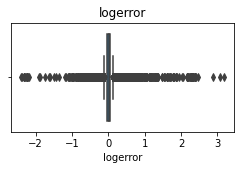

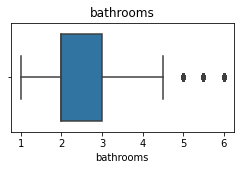

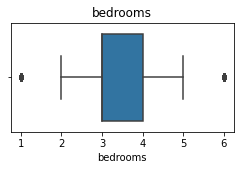

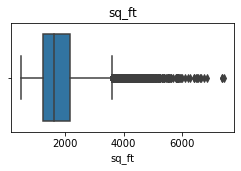

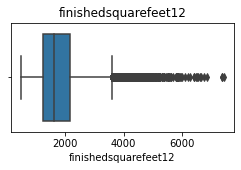

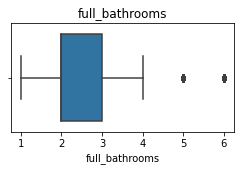

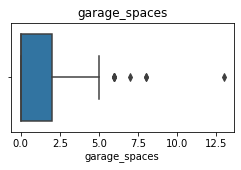

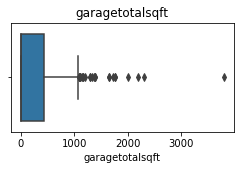

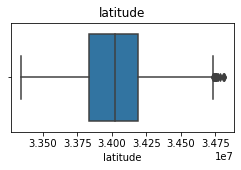

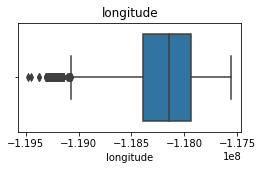

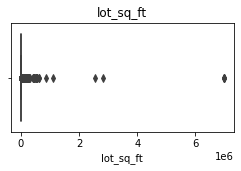

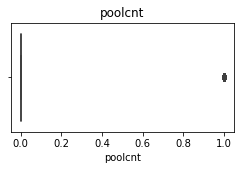

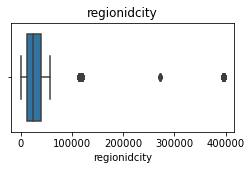

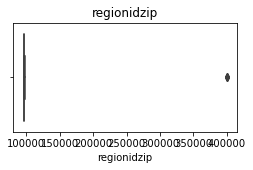

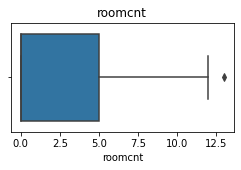

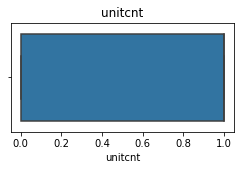

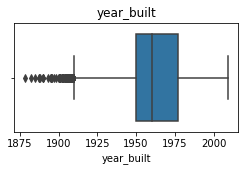

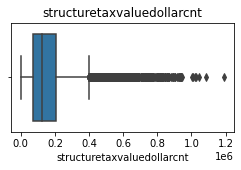

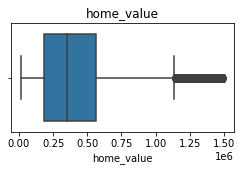

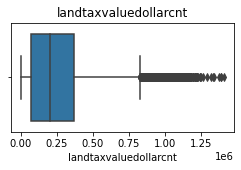

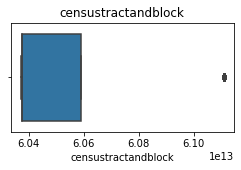

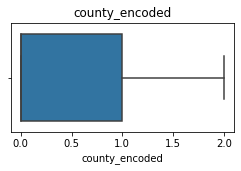

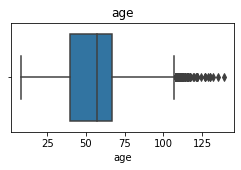

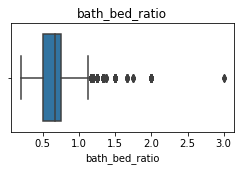

TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 288x144 with 0 Axes>

In [22]:
for col in train_explore.columns:
    plt.figure(figsize=(4,2))
    sns.boxplot(train_explore[col])
    plt.title(col)
    plt.show()

In [ ]:
cat_cols = ['bedrooms', 'bathrooms', 'garage_spaces', 'decade_built', 'location']
cont_cols = ['logerror', 'sq_ft', 'home_value', 'lot_sq_ft']

# Creating a plot loop that iterates through all combinations of variables
def plot_categorical_and_continuous_vars(train, cat_cols, cont_cols):
    train_sample = train.sample(5000)
    for cont in cont_cols:
        for cat in cat_cols:
            fig = plt.figure(figsize= (20, 10))
            fig.suptitle(f'{cont} vs {cat}')
            

            plt.subplot(131)
            sns.stripplot(data=train_sample, x = cat, y = cont)
           

            plt.subplot(1, 3, 3)
            sns.boxplot(data = train_sample, x = cont, hue = cat)
            
            
            plt.subplot(1, 3, 2)
            sns.barplot(data = train_sample, x = cat, y = cont)

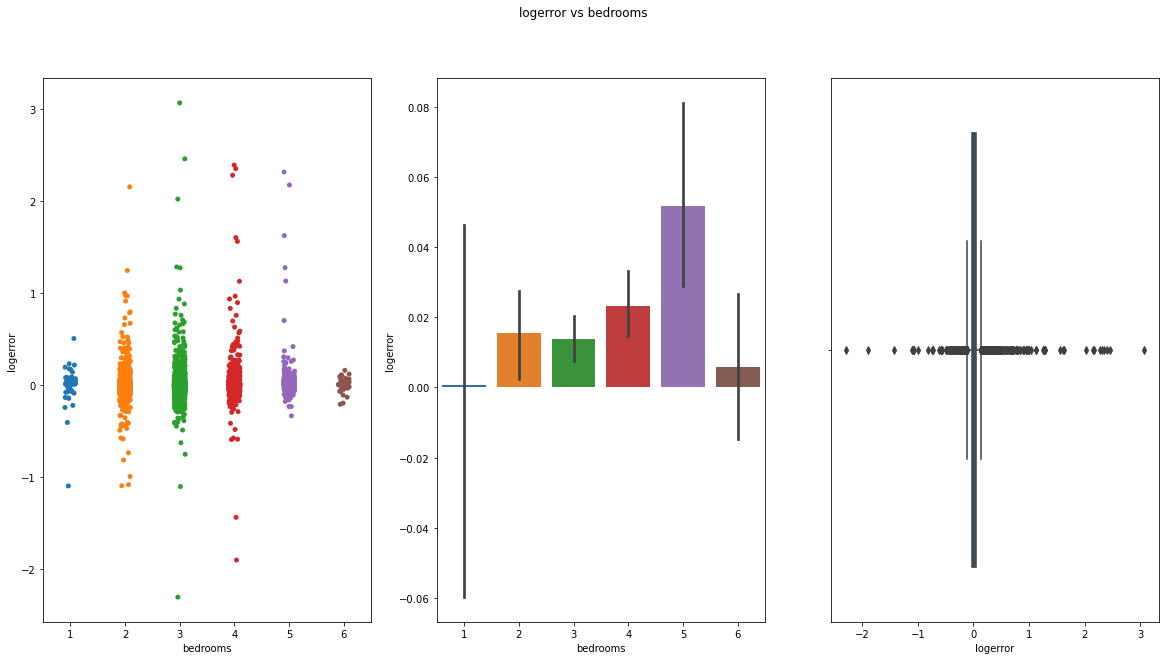

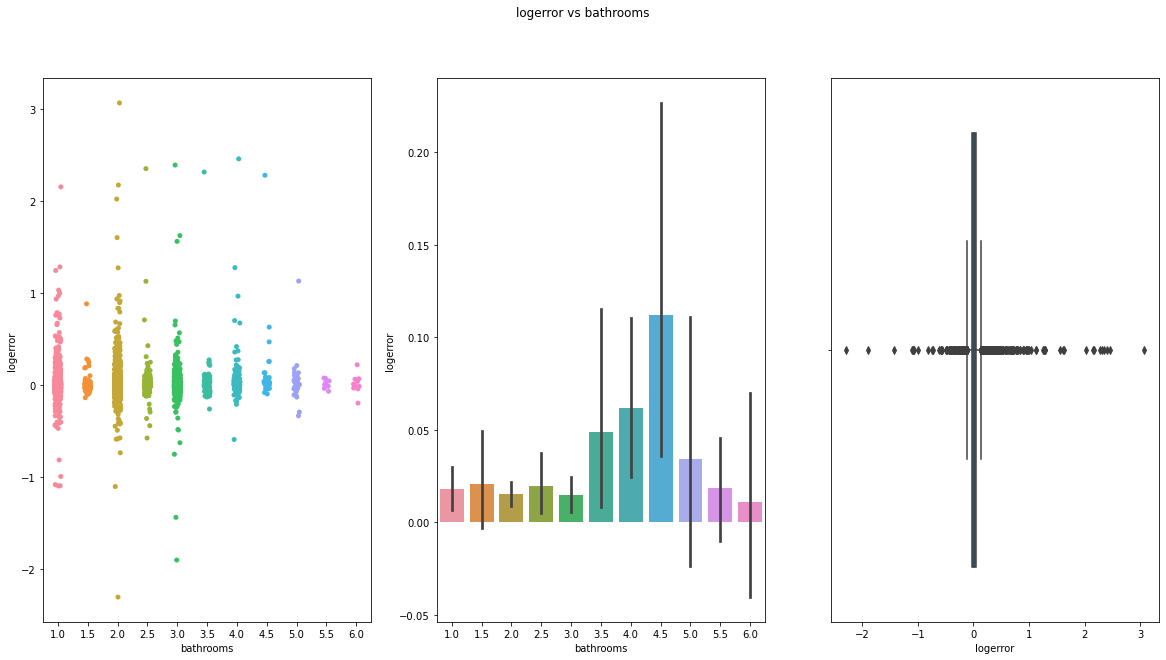

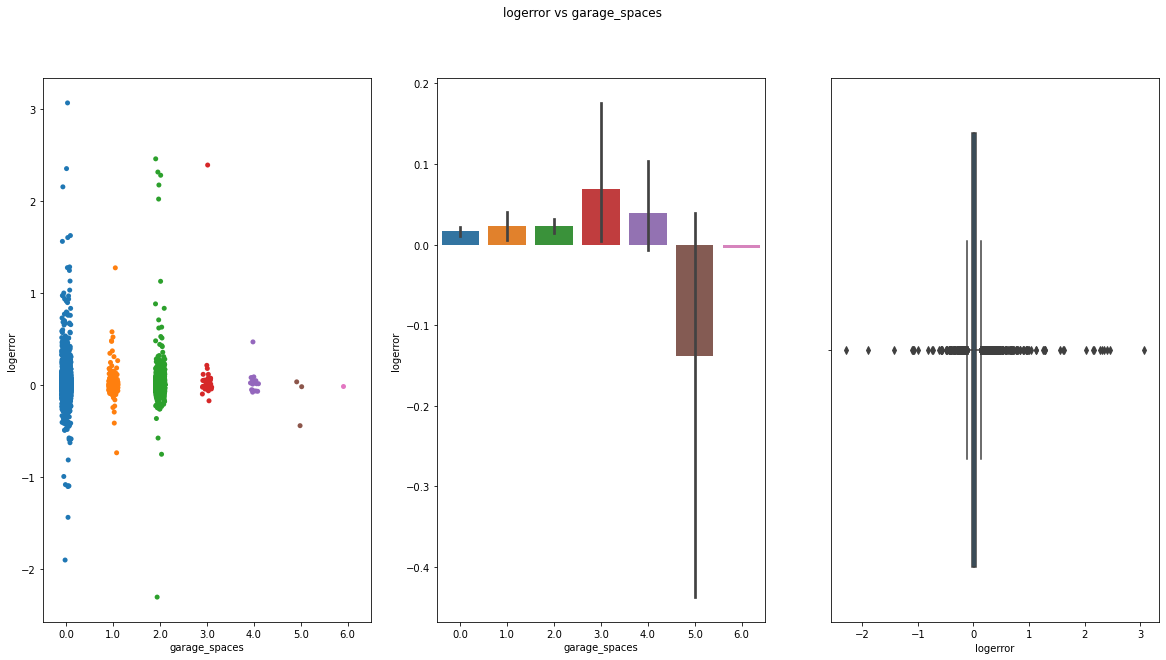

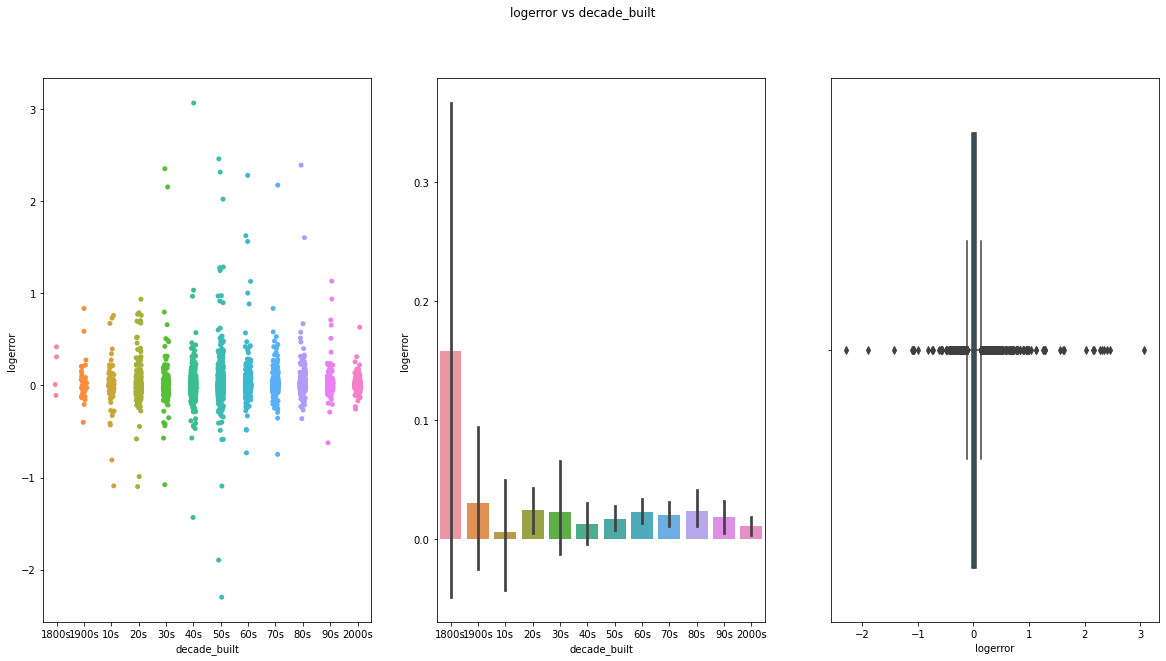

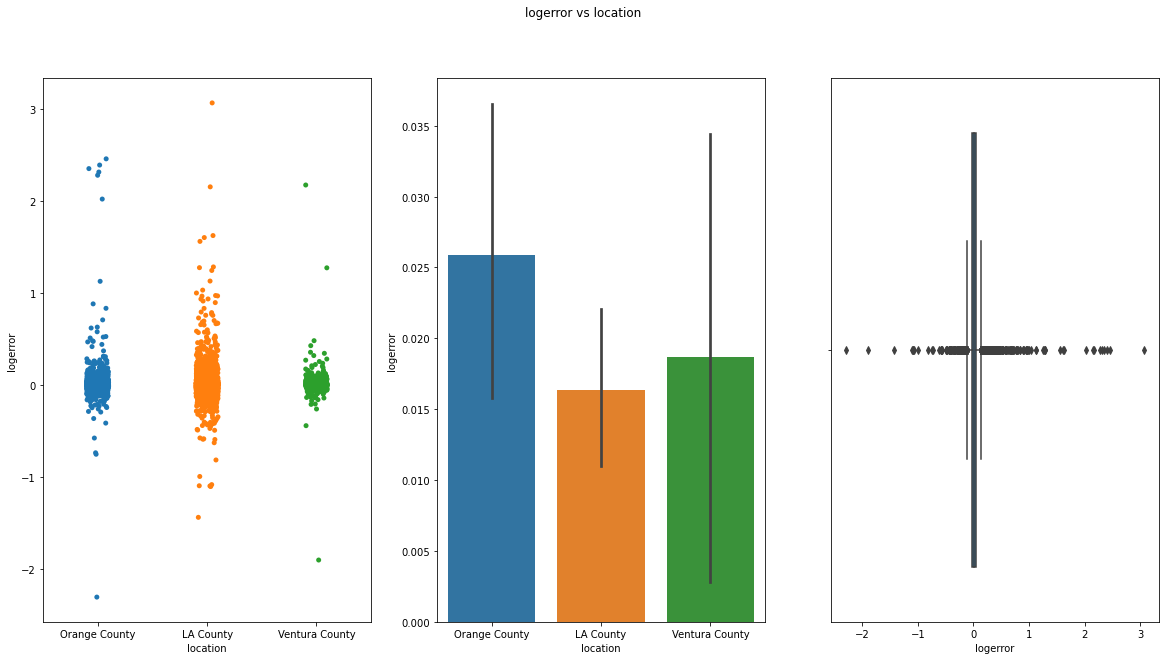

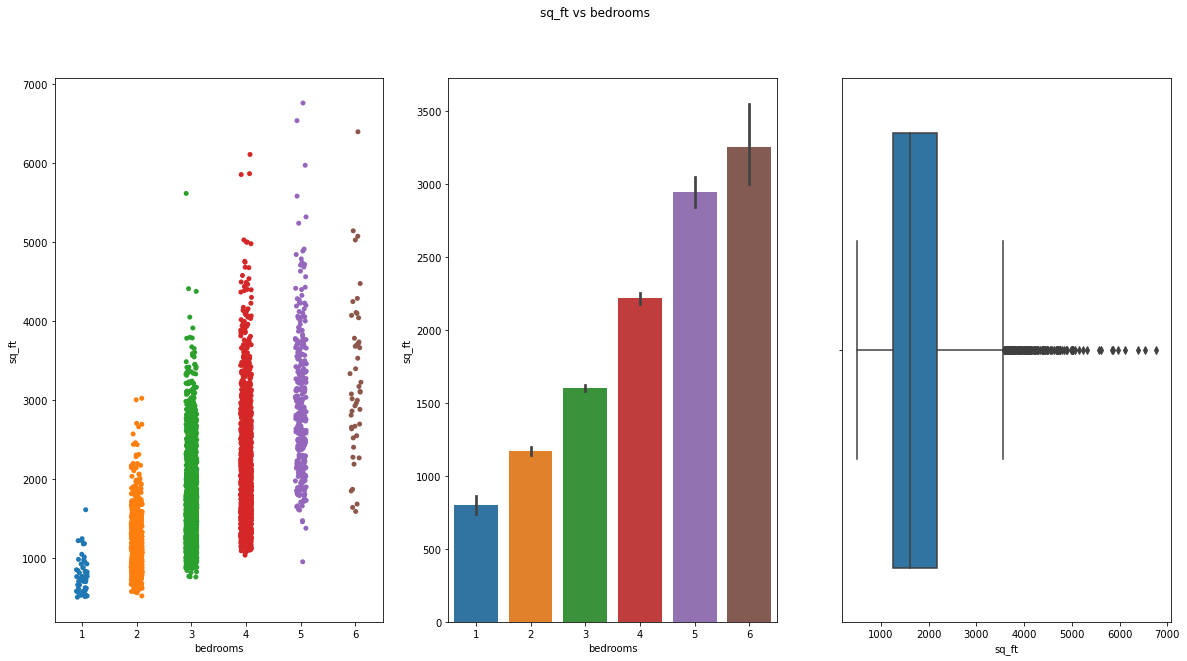

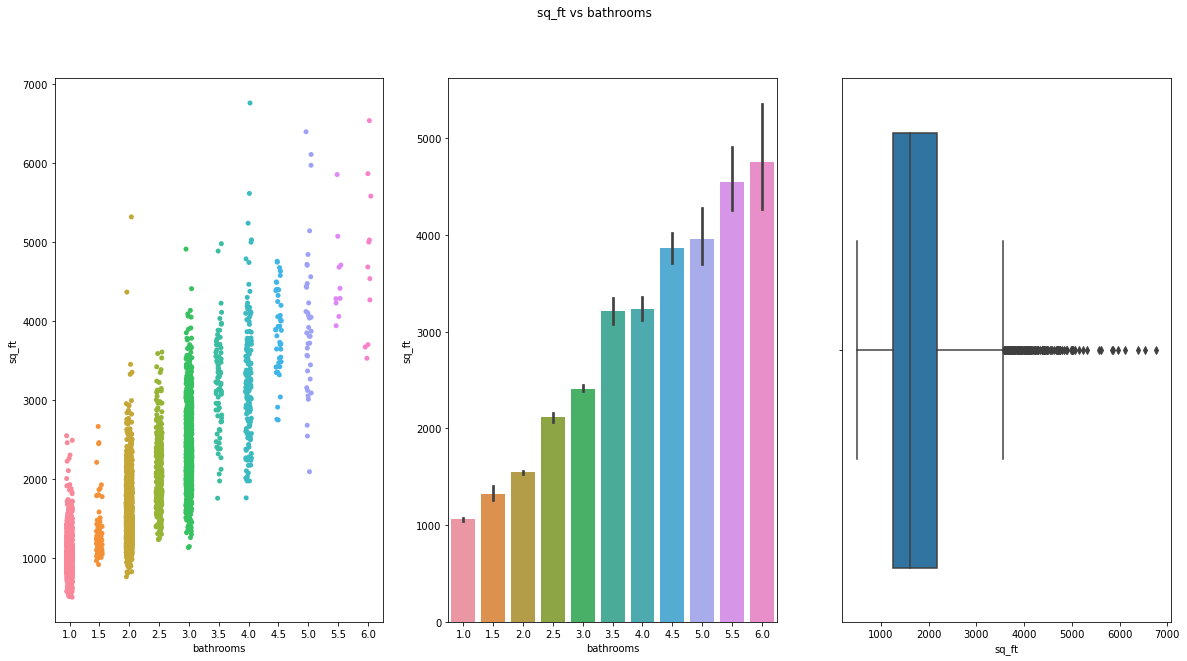

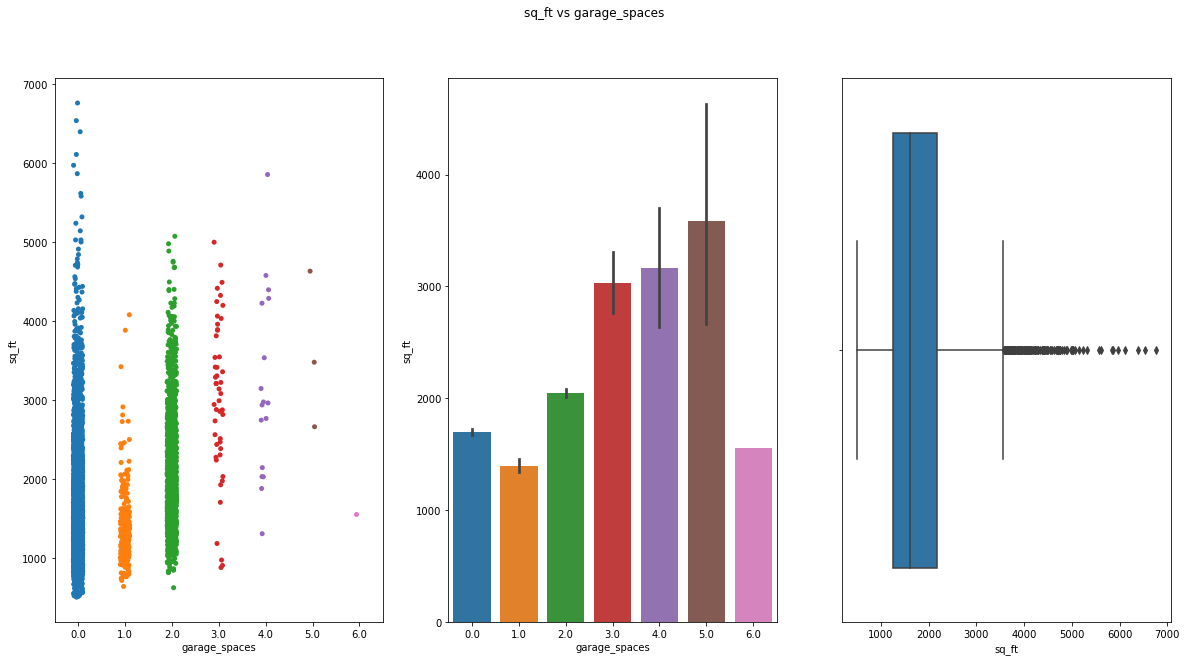

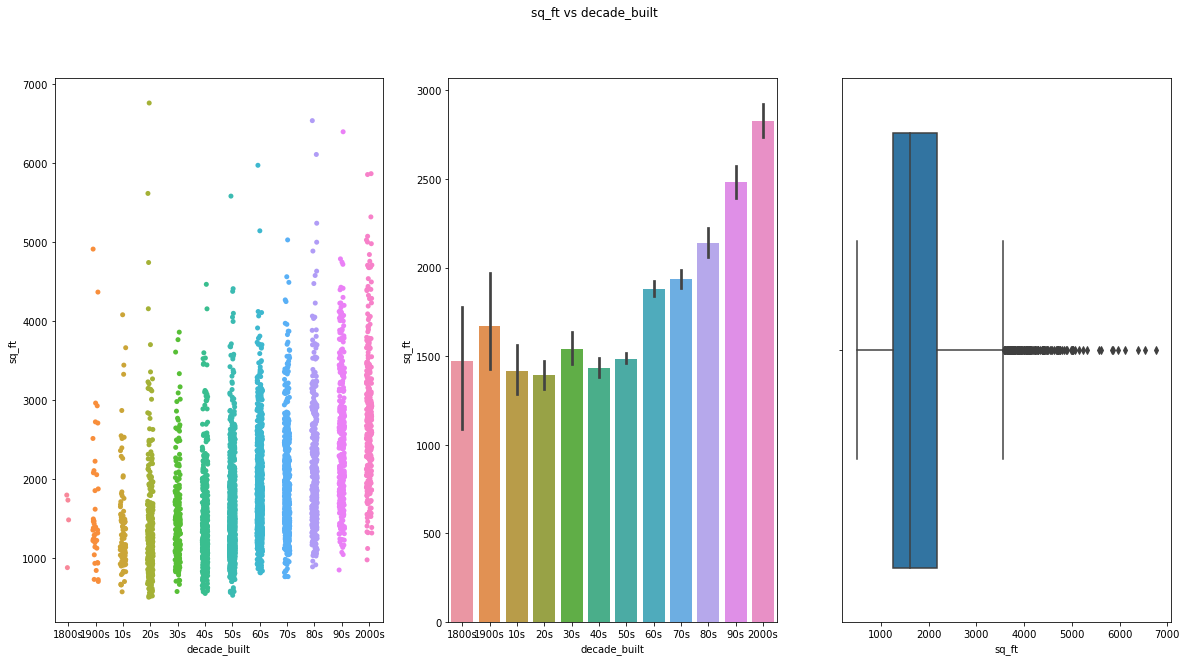

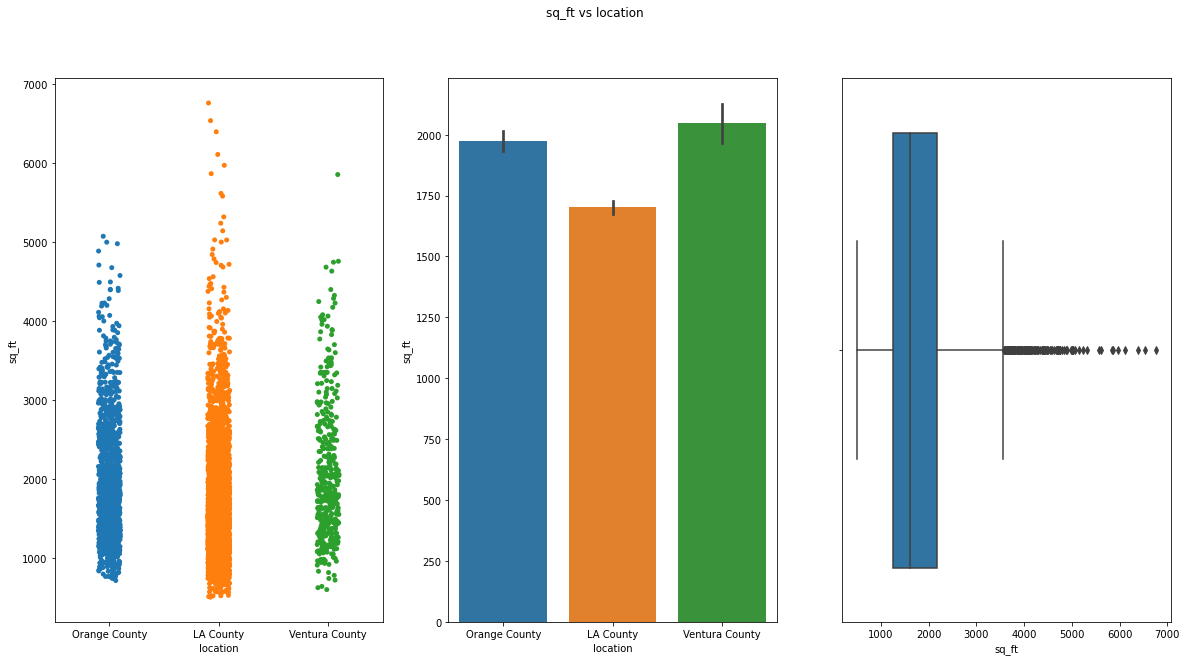

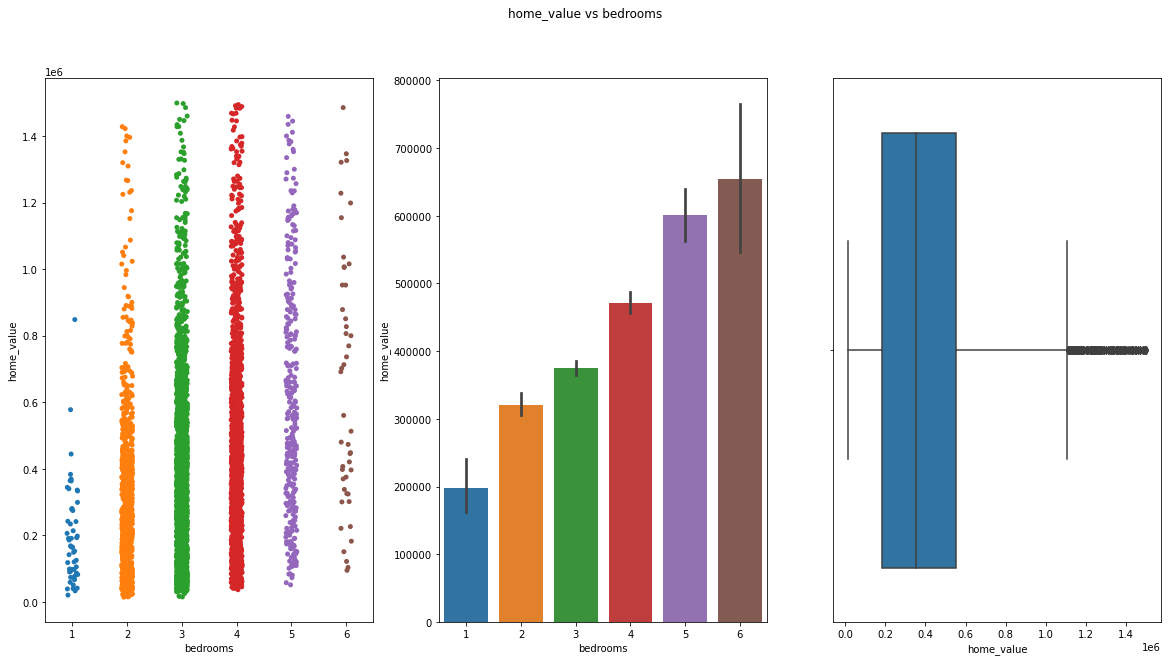

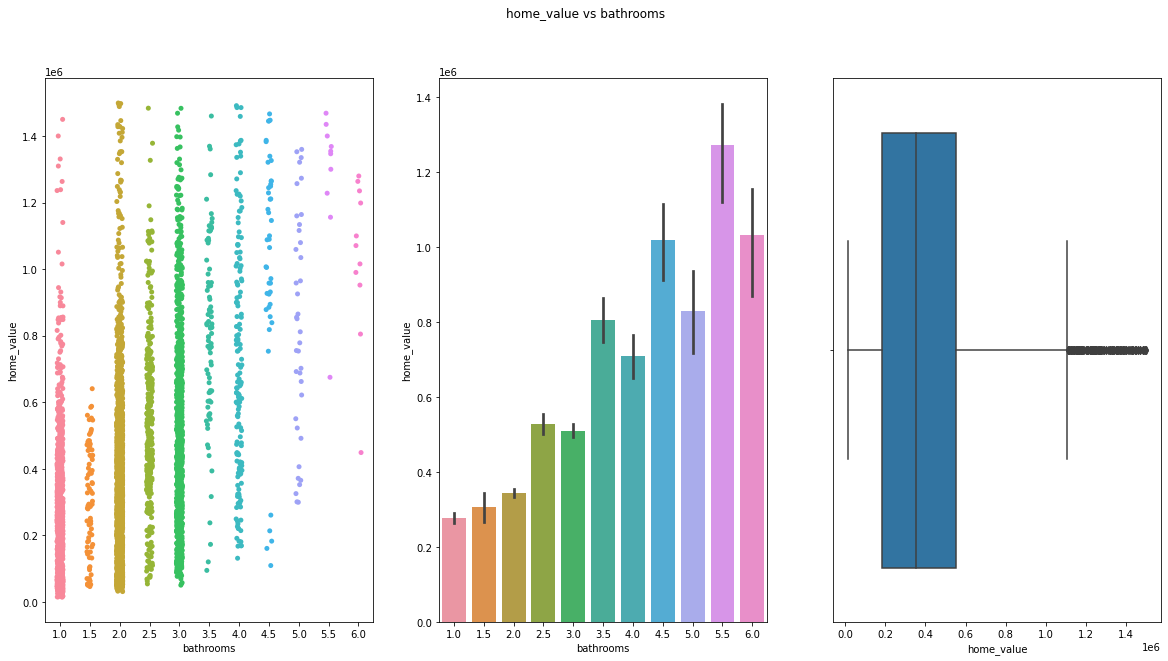

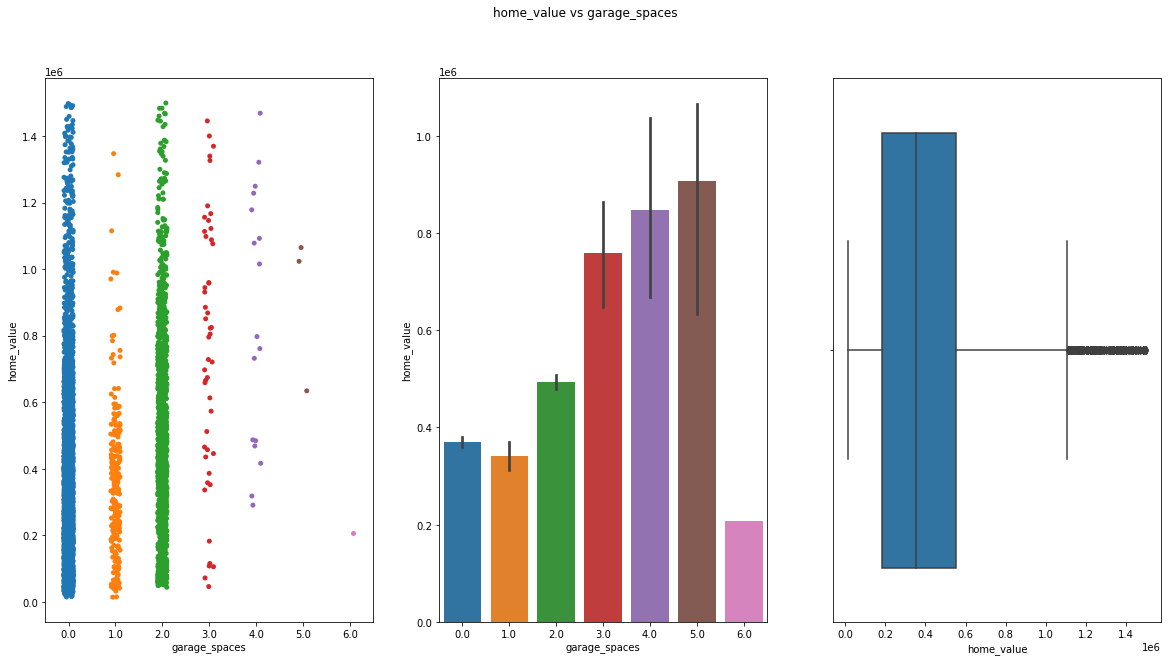

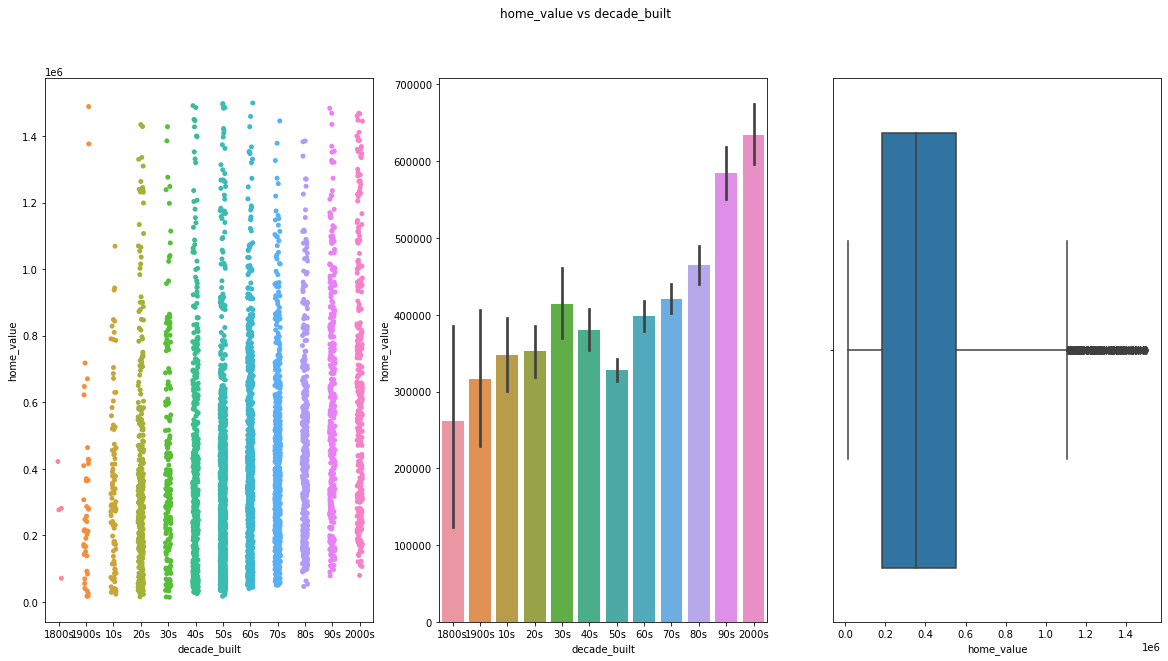

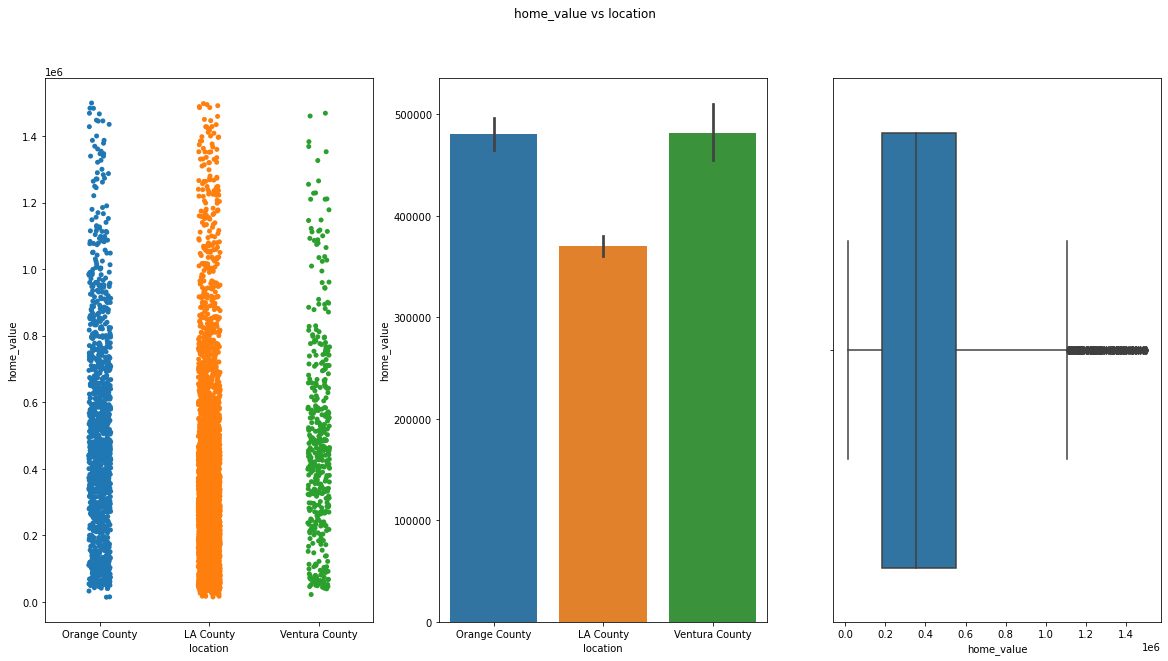

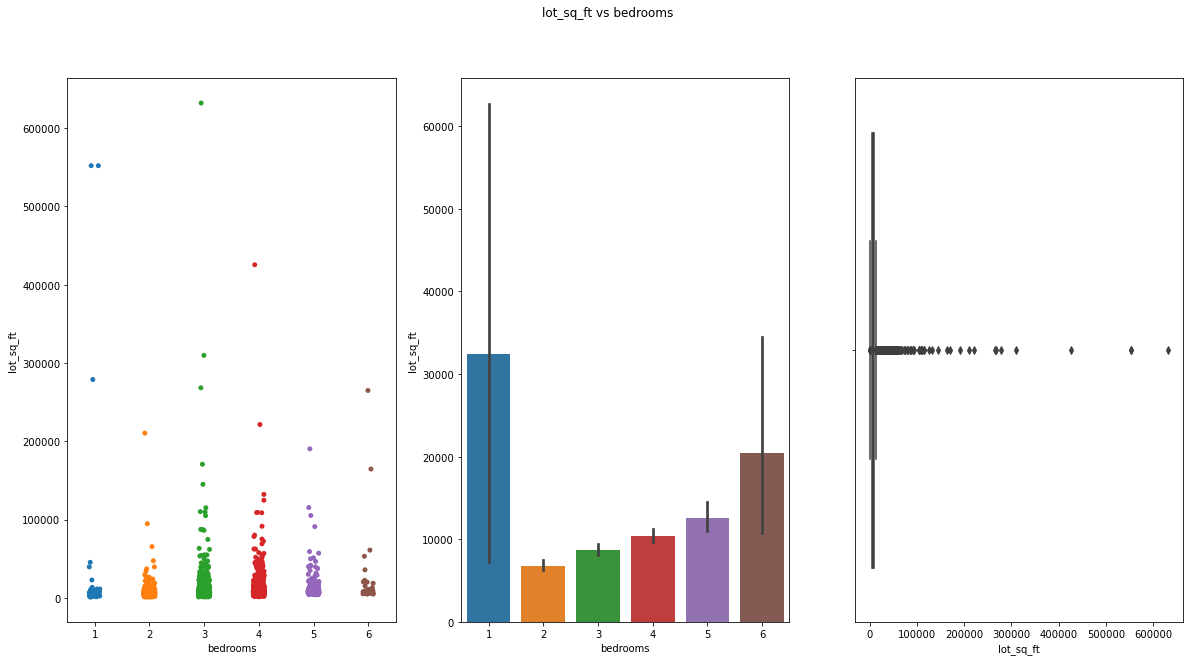

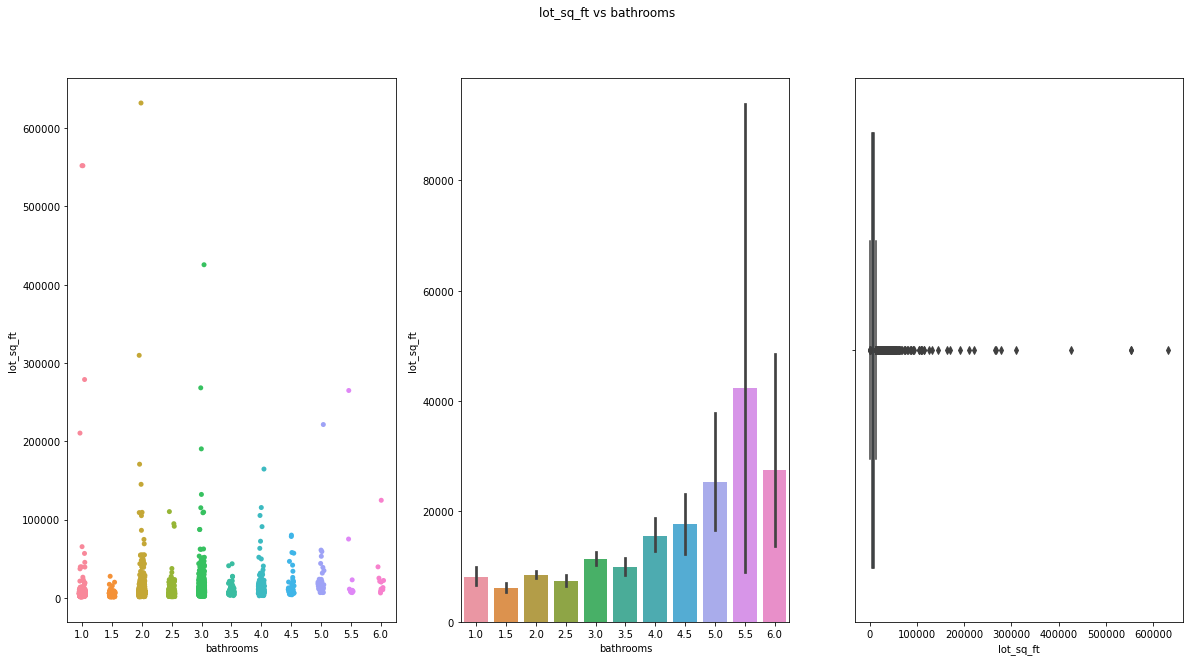

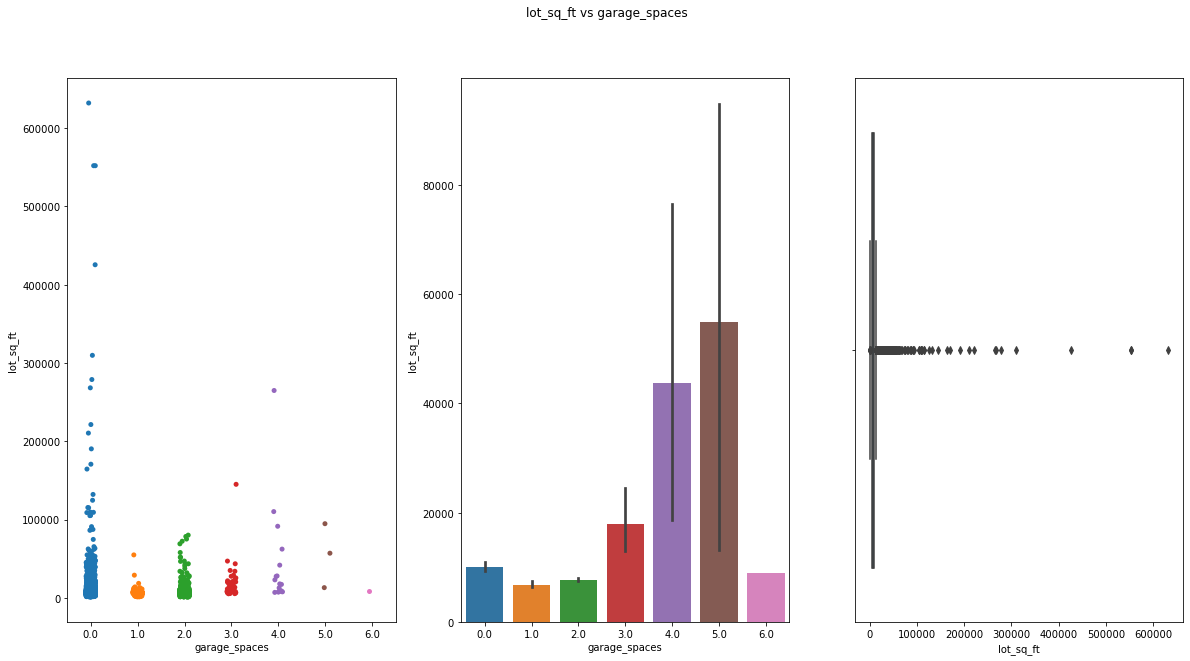

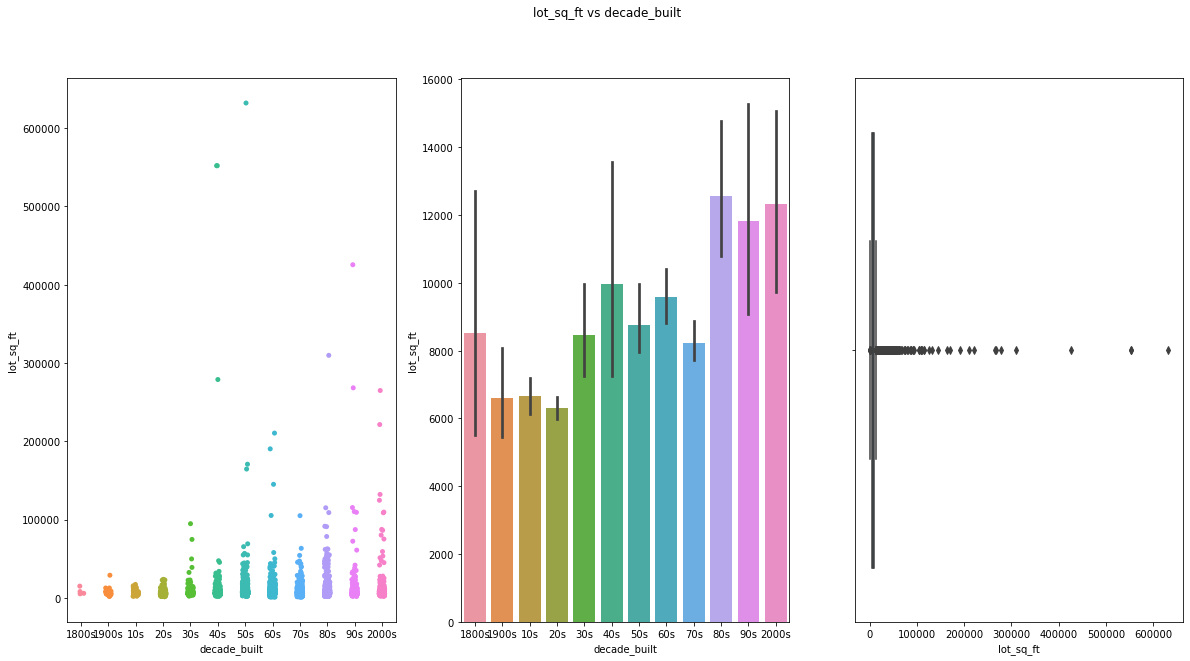

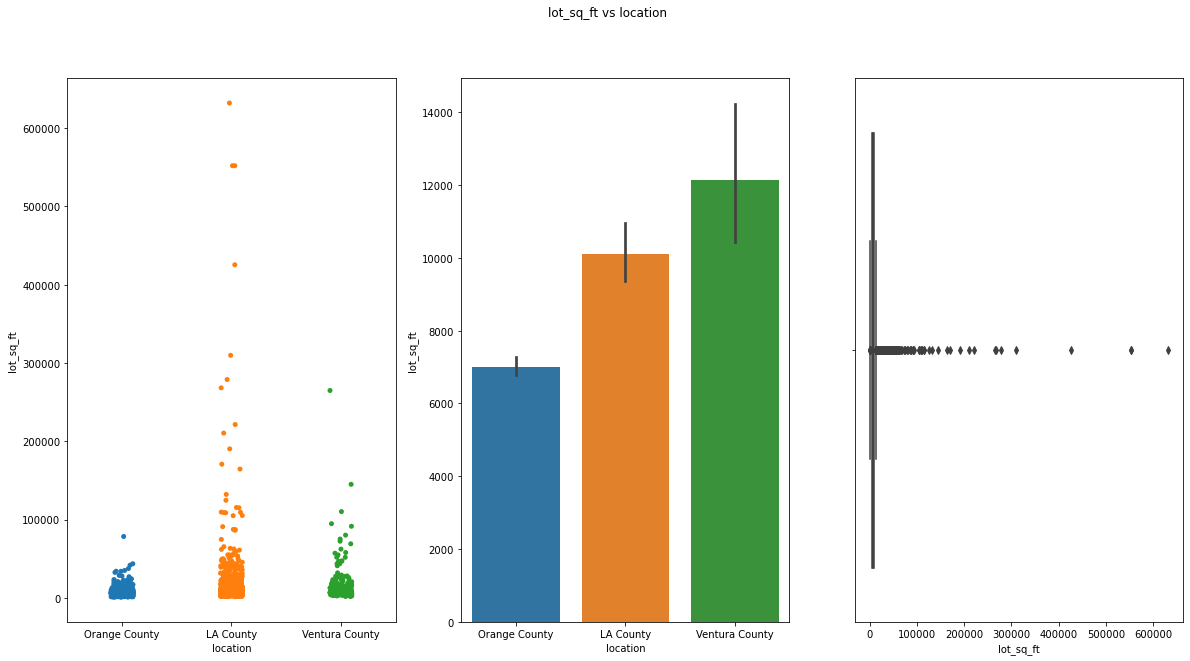

In [ ]:
plot_categorical_and_continuous_vars(train, cat_cols, cont_cols)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27028 entries, 14875 to 20163
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   logerror                    27028 non-null  float64 
 1   transactiondate             27028 non-null  object  
 2   bathrooms                   27028 non-null  float64 
 3   bedrooms                    27028 non-null  int64   
 4   sq_ft                       27028 non-null  int64   
 5   finishedsquarefeet12        27028 non-null  float64 
 6   location                    27028 non-null  object  
 7   full_bathrooms              27028 non-null  float64 
 8   garage_spaces               27028 non-null  float64 
 9   garagetotalsqft             27028 non-null  float64 
 10  latitude                    27028 non-null  float64 
 11  longitude                   27028 non-null  float64 
 12  lot_sq_ft                   27028 non-null  float64 
 13  poolcnt     

In [ ]:
train.propertycountylandusecode.value_counts()

0100    14233
122      6737
0101     3065
1111     1840
1110      474
1         373
0104      174
010G       42
010M       30
0108       25
0103       23
0109        4
0102        3
0105        2
1112        1
0131        1
0130        1
Name: propertycountylandusecode, dtype: int64

In [ ]:
cat_cols = ['bedrooms', 'bathrooms', 'garage_spaces', 'decade_built', 'location', 'poolcnt', 'propertycountylandusecode']
cont_cols = ['logerror']

# Creating a plot loop that iterates through all combinations of variables
def plot_categorical_and_continuous_vars(train, cat_cols, cont_cols):
    train_sample = train.sample(5000)
    for cont in cont_cols:
        for cat in cat_cols:
            fig = plt.figure(figsize= (20, 10))
            fig.suptitle(f'{cont} vs {cat}')
            

            plt.subplot(131)
            sns.stripplot(data=train_sample, x = cat, y = cont)
           

            plt.subplot(1, 3, 3)
            sns.boxplot(data = train_sample, x = cont, hue = cat)
            
            
            plt.subplot(1, 3, 2)
            sns.barplot(data = train_sample, x = cat, y = cont)

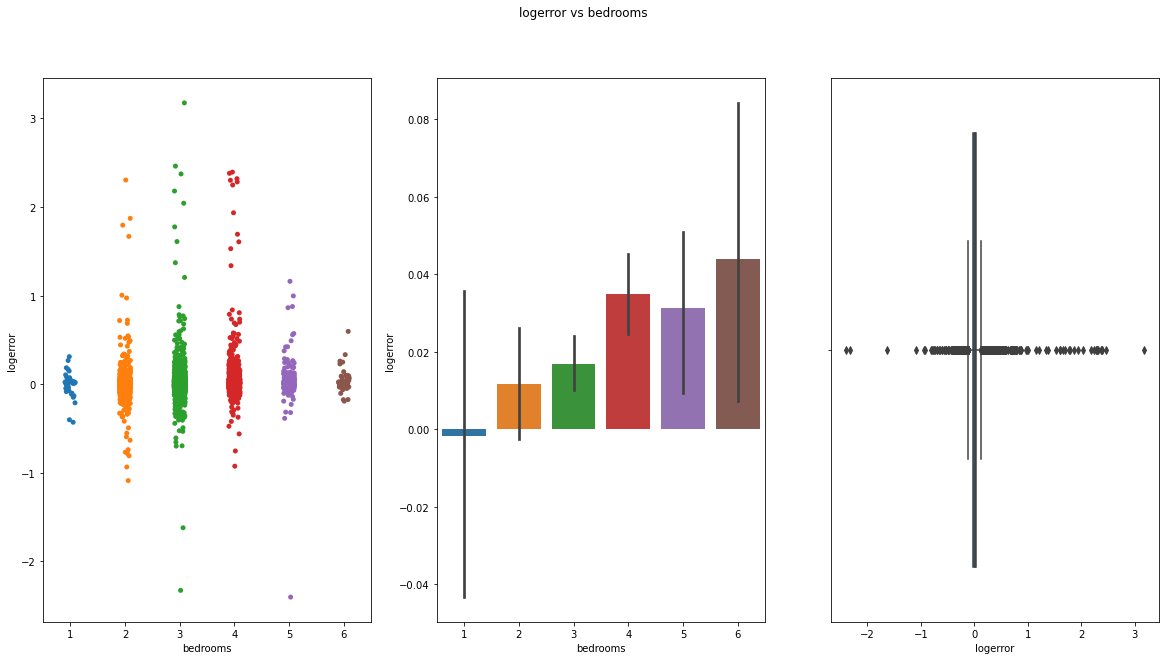

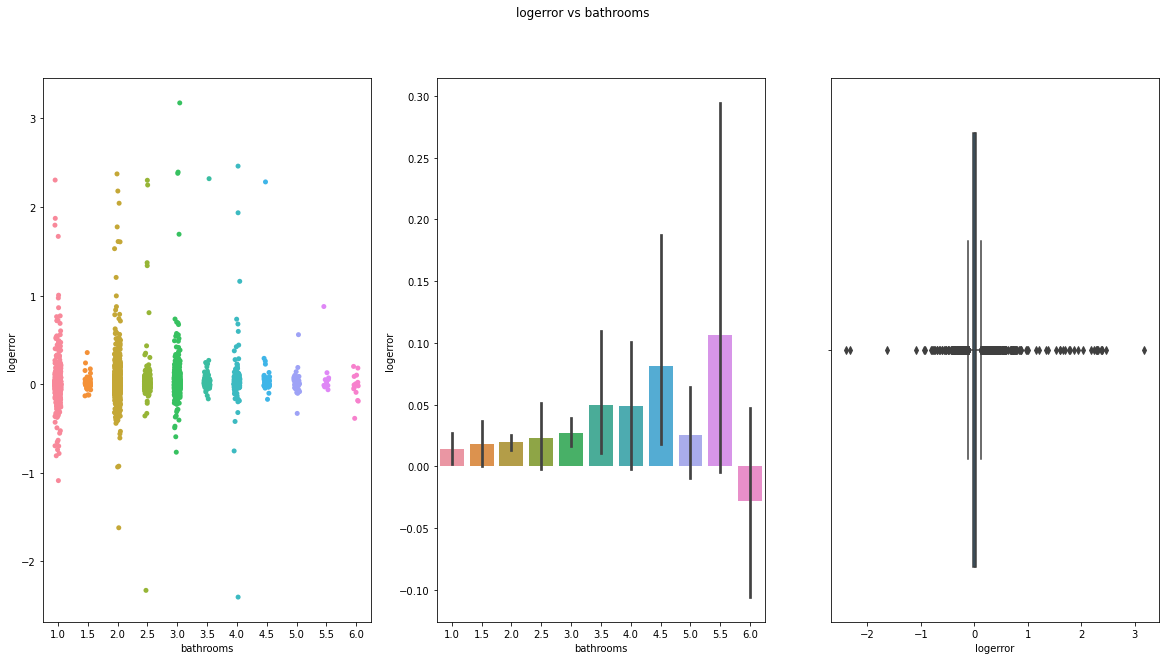

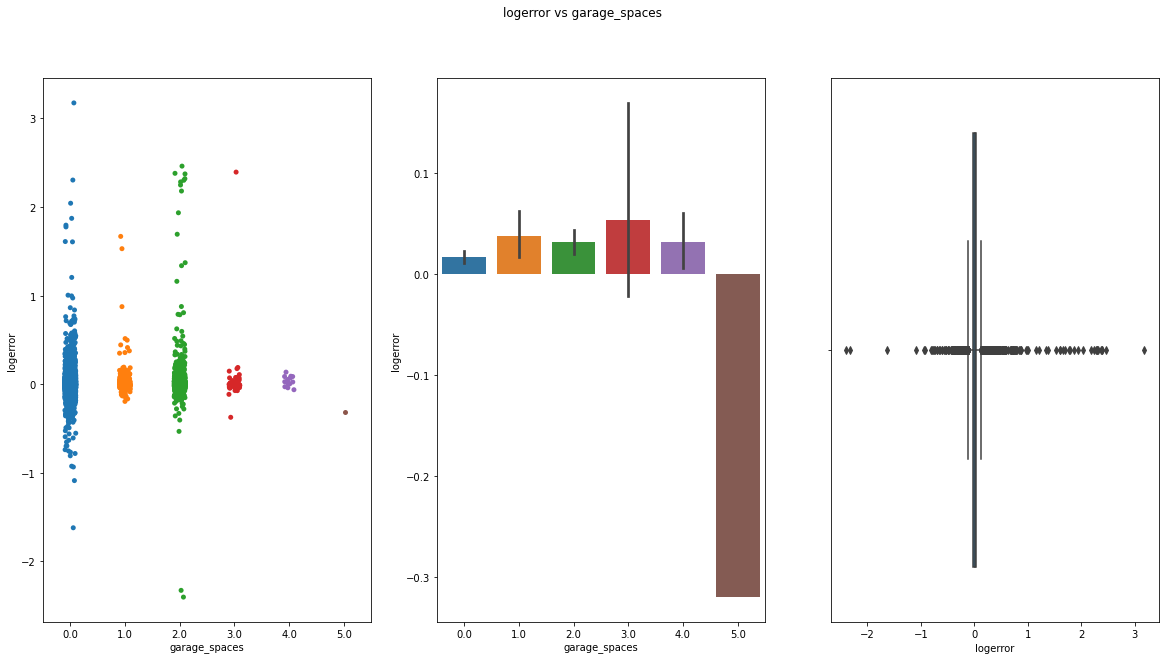

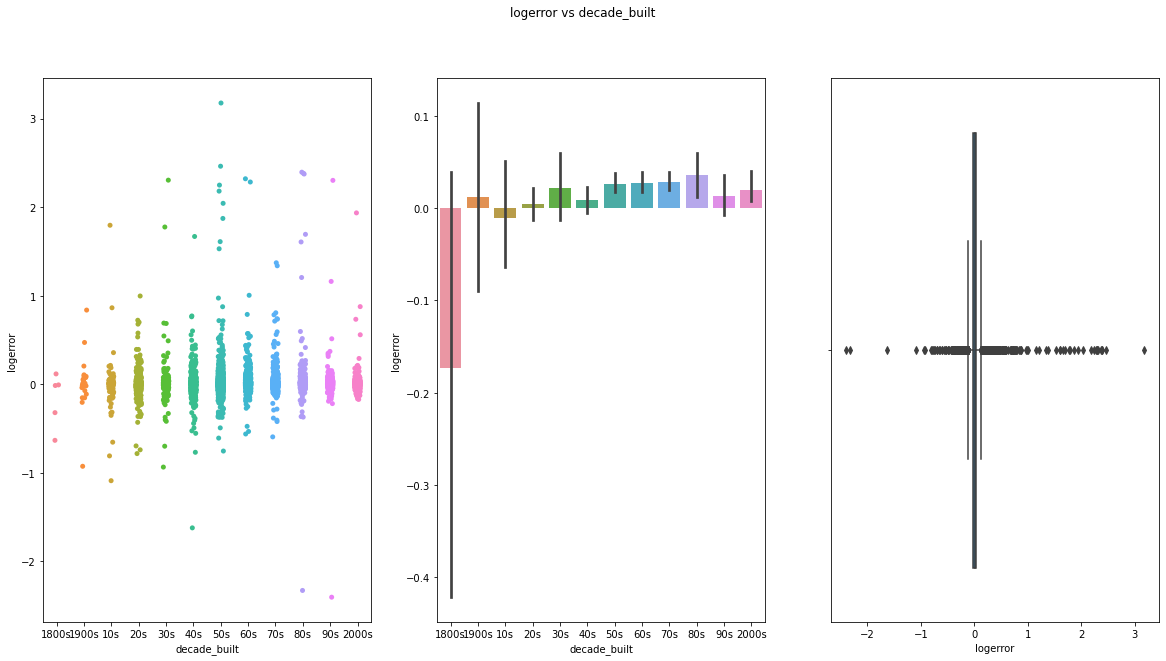

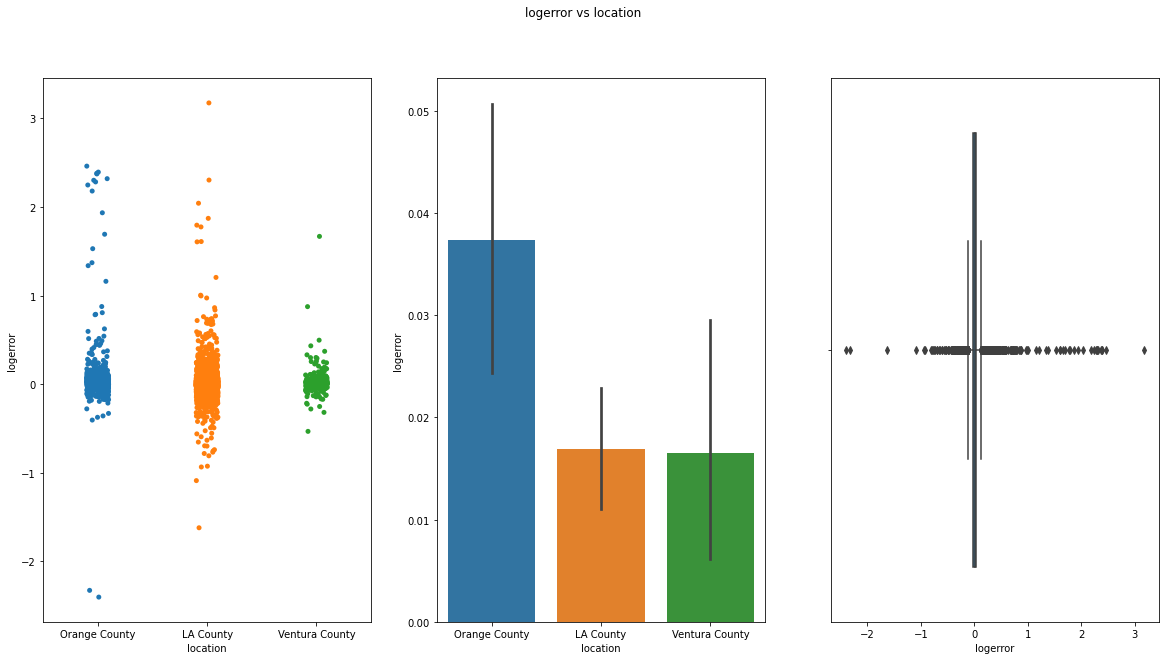

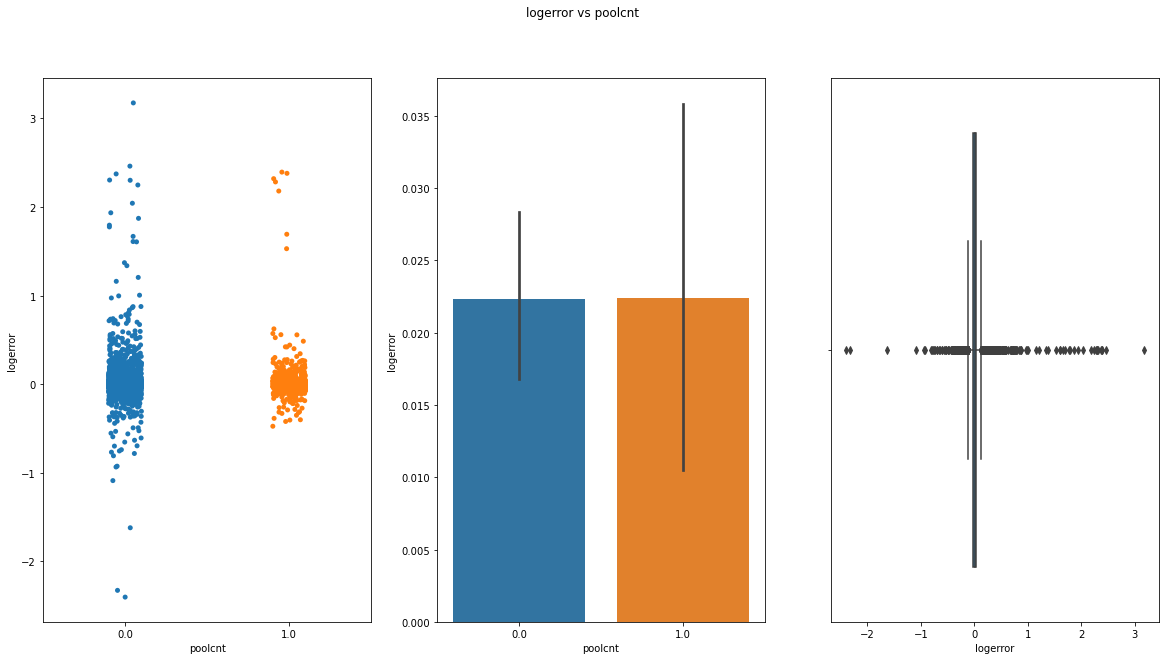

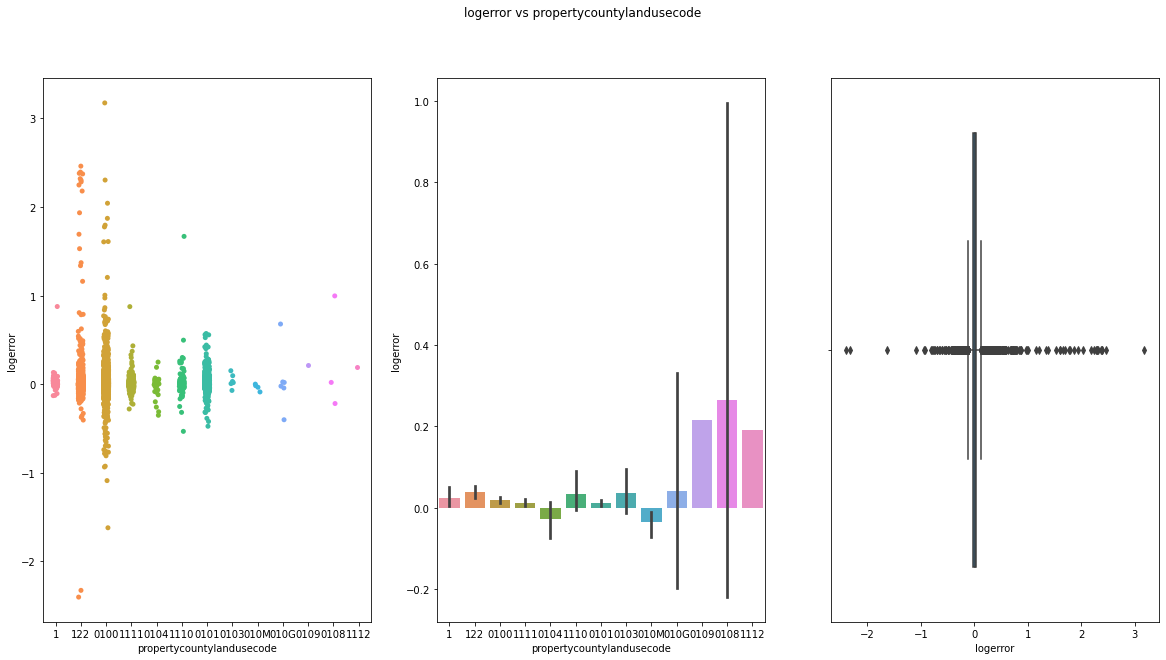

In [ ]:
plot_categorical_and_continuous_vars(train, cat_cols, cont_cols)

In [ ]:
print(train.latitude.nunique())
train.latitude.value_counts()

26535


34,047,500.00    5
33,494,800.00    5
33,765,800.00    4
34,487,900.00    4
34,567,163.00    3
                ..
34,073,206.00    1
34,235,902.00    1
33,877,540.00    1
34,438,755.00    1
33,982,550.00    1
Name: latitude, Length: 26535, dtype: int64

In [ ]:
print(train.longitude.nunique())
train.longitude.value_counts()

26613


-117,670,000.00    5
-117,830,000.00    5
-118,249,000.00    5
-118,183,000.00    4
-118,172,000.00    4
                  ..
-119,018,024.00    1
-117,978,848.00    1
-119,265,746.00    1
-118,487,882.00    1
-118,060,920.00    1
Name: longitude, Length: 26613, dtype: int64

In [ ]:
train.longitude.nunique()

26613

In [ ]:
train.location.value_counts()

LA County         17603
Orange County      7110
Ventura County     2315
Name: location, dtype: int64

In [ ]:
train.censustract_bin.value_counts()

0    17603
1     7110
2     2315
Name: censustract_bin, dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27028 entries, 14875 to 20163
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   logerror                    27028 non-null  float64 
 1   transactiondate             27028 non-null  object  
 2   bathrooms                   27028 non-null  float64 
 3   bedrooms                    27028 non-null  int64   
 4   sq_ft                       27028 non-null  int64   
 5   finishedsquarefeet12        27028 non-null  float64 
 6   location                    27028 non-null  object  
 7   full_bathrooms              27028 non-null  float64 
 8   garage_spaces               27028 non-null  float64 
 9   garagetotalsqft             27028 non-null  float64 
 10  latitude                    27028 non-null  float64 
 11  longitude                   27028 non-null  float64 
 12  lot_sq_ft                   27028 non-null  float64 
 13  poolcnt     

### Scaling

Features to scale:
1. latitude
2. longitude
3. sqft
4. propertycountylandusecode
5. lot_sq_ft

In [ ]:
# Calling our model.py; Assigning df variables to our called function, `scale_data`
train_scaled, validate_scaled, test_scaled = model.scale_data(train, validate, test)

In [ ]:
# Splitting train, validate, and test dfs on x and y FOR SCALED DF
x_train_scaled = train_scaled.drop(columns=['logerror'])
x_validate_scaled = validate_scaled.drop(columns=['logerror'])
x_test_scaled = test_scaled.drop(columns=['logerror'])

y_train_scaled = train_scaled['logerror']
y_validate_scaled = validate_scaled['logerror']
y_test_scaled = test_scaled['logerror']

In [ ]:
train.head()

,logerror,transactiondate,bathrooms,bedrooms,sq_ft,finishedsquarefeet12,location,full_bathrooms,garage_spaces,garagetotalsqft,...,home_value,landtaxvaluedollarcnt,censustractandblock,decade_built,county_encoded,age,censustract_bin,bath_bed_ratio,census_county_bin,census_quarter_bin
14875,0.08,2017-03-31,2.00,3,1185,"1,185.00",LA County,2.00,0.00,0.00,...,585000,"425,000.00","60,375,545,111,019.00",70s,0,46,0,0.67,LA,"(60374016031015.0, 60376025083002.0]"
11357,-0.06,2017-03-14,2.00,2,1494,"1,494.00",LA County,2.00,0.00,0.00,...,311846,"168,588.00","60,374,061,011,000.00",50s,0,67,0,1.00,LA,"(60374016031015.0, 60376025083002.0]"
20714,-0.10,2017-04-28,2.00,4,1120,"1,120.00",LA County,2.00,0.00,0.00,...,261781,"119,139.00","60,372,400,201,005.00",2000s,0,14,0,0.50,LA,"(60371011101000.0, 60374016031015.0]"
37077,0.00,2017-07-07,2.50,4,1667,"1,667.00",Orange County,2.00,2.00,531.00,...,633000,"493,028.00","60,590,015,031,037.00",70s,1,47,1,0.62,Orange,"(60376025083002.0, 60590423104005.0]"
14313,0.01,2017-03-29,2.00,2,1104,"1,104.00",Ventura County,2.00,2.00,0.00,...,615000,"541,000.00","61,110,052,022,015.00",60s,2,57,2,1.00,Ventura,"(60590423104005.0, 483030105084015.0]"


In [ ]:
train_scaled.head()

,logerror,transactiondate,bathrooms,bedrooms,sq_ft,finishedsquarefeet12,location,full_bathrooms,garage_spaces,garagetotalsqft,...,home_value,landtaxvaluedollarcnt,censustractandblock,decade_built,county_encoded,age,censustract_bin,bath_bed_ratio,census_county_bin,census_quarter_bin
14875,0.08,2017-03-31,0.20,0.40,0.10,"1,185.00",LA County,2.00,0.00,0.00,...,585000,"425,000.00","60,375,545,111,019.00",70s,0,46,0,0.67,LA,"(60374016031015.0, 60376025083002.0]"
11357,-0.06,2017-03-14,0.20,0.20,0.14,"1,494.00",LA County,2.00,0.00,0.00,...,311846,"168,588.00","60,374,061,011,000.00",50s,0,67,0,1.00,LA,"(60374016031015.0, 60376025083002.0]"
20714,-0.10,2017-04-28,0.20,0.60,0.09,"1,120.00",LA County,2.00,0.00,0.00,...,261781,"119,139.00","60,372,400,201,005.00",2000s,0,14,0,0.50,LA,"(60371011101000.0, 60374016031015.0]"
37077,0.00,2017-07-07,0.30,0.60,0.17,"1,667.00",Orange County,2.00,0.15,531.00,...,633000,"493,028.00","60,590,015,031,037.00",70s,1,47,1,0.62,Orange,"(60376025083002.0, 60590423104005.0]"
14313,0.01,2017-03-29,0.20,0.20,0.09,"1,104.00",Ventura County,2.00,0.15,0.00,...,615000,"541,000.00","61,110,052,022,015.00",60s,2,57,2,1.00,Ventura,"(60590423104005.0, 483030105084015.0]"


In [ ]:
x_train_scaled.head()

,transactiondate,bathrooms,bedrooms,sq_ft,finishedsquarefeet12,location,full_bathrooms,garage_spaces,garagetotalsqft,latitude,...,home_value,landtaxvaluedollarcnt,censustractandblock,decade_built,county_encoded,age,censustract_bin,bath_bed_ratio,census_county_bin,census_quarter_bin
14875,2017-03-31,0.20,0.40,0.10,"1,185.00",LA County,2.00,0.00,0.00,"33,877,093.00",...,585000,"425,000.00","60,375,545,111,019.00",70s,0,46,0,0.67,LA,"(60374016031015.0, 60376025083002.0]"
11357,2017-03-14,0.20,0.20,0.14,"1,494.00",LA County,2.00,0.00,0.00,"34,093,079.00",...,311846,"168,588.00","60,374,061,011,000.00",50s,0,67,0,1.00,LA,"(60374016031015.0, 60376025083002.0]"
20714,2017-04-28,0.20,0.60,0.09,"1,120.00",LA County,2.00,0.00,0.00,"33,955,012.00",...,261781,"119,139.00","60,372,400,201,005.00",2000s,0,14,0,0.50,LA,"(60371011101000.0, 60374016031015.0]"
37077,2017-07-07,0.30,0.60,0.17,"1,667.00",Orange County,2.00,0.15,531.00,"33,916,657.00",...,633000,"493,028.00","60,590,015,031,037.00",70s,1,47,1,0.62,Orange,"(60376025083002.0, 60590423104005.0]"
14313,2017-03-29,0.20,0.20,0.09,"1,104.00",Ventura County,2.00,0.15,0.00,"34,249,297.00",...,615000,"541,000.00","61,110,052,022,015.00",60s,2,57,2,1.00,Ventura,"(60590423104005.0, 483030105084015.0]"


In [23]:
train_scaled.info()

NameError: name 'train_scaled' is not defined

## Creating Clusters

#### Cluster 1: bedrooms, bathrooms, garage_spaces

In [ ]:
# list of variables I will cluster on. 
cluster_vars = ['bedrooms', 'bathrooms', 'garage_spaces']
cluster_name = 'home_space_cluster'
k_range = range(2,20)

In [ ]:
def find_k(x_train_scaled, cluster_vars, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        # X[0] is our X_train dataframe..the first dataframe in the list of dataframes stored in X. 
        kmeans.fit(x_train_scaled[cluster_vars])

        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_) 

    # compute the difference from one k to the next
    delta = [round(sse[i] - sse[i+1],0) for i in range(len(sse)-1)]

    # compute the percent difference from one k to the next
    pct_delta = [round(((sse[i] - sse[i+1])/sse[i])*100, 1) for i in range(len(sse)-1)]

    # create a dataframe with all of our metrics to compare them across values of k: SSE, delta, pct_delta
    k_comparisons_df = pd.DataFrame(dict(k=k_range[0:-1], 
                             sse=sse[0:-1], 
                             delta=delta, 
                             pct_delta=pct_delta))

    # plot k with inertia
    plt.plot(k_comparisons_df.k, k_comparisons_df.sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find the optimal k\nFor which k values do we see large decreases in SSE?')
    plt.show()

    # plot k with pct_delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.pct_delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Percent Change')
    plt.title('For which k values are we seeing increased changes (%) in SSE?')
    plt.show()

    # plot k with delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Absolute Change in SSE')
    plt.title('For which k values are we seeing increased changes (absolute) in SSE?')
    plt.show()

    return k_comparisons_df

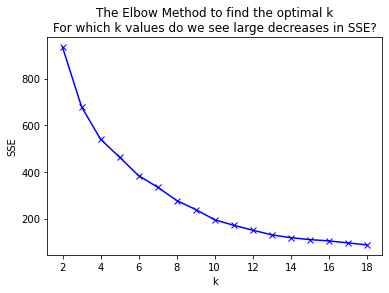

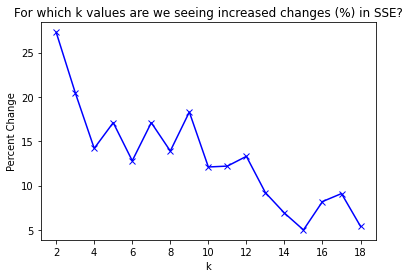

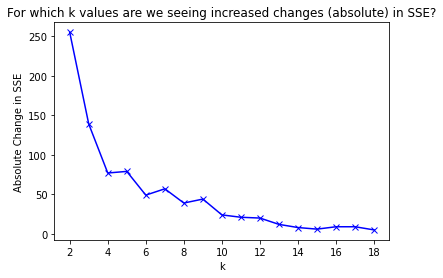

,k,sse,delta,pct_delta
0,2,933.93,255.00,27.30
1,3,678.78,139.00,20.50
2,4,539.73,77.00,14.20
3,5,462.94,79.00,17.10
4,6,383.95,49.00,12.80
5,7,334.78,57.00,17.10
6,8,277.54,39.00,13.90
7,9,239.01,44.00,18.30
8,10,195.16,24.00,12.10
9,11,171.55,21.00,12.20


In [ ]:
find_k(x_train_scaled, cluster_vars, k_range)

In [ ]:
k = 6
# as reminders: 
cluster_vars = ['scaled_latitude', 'scaled_longitude', 'age_bin']
cluster_name = 'area_cluster'

In [ ]:
def create_clusters(x_train_scaled, k, cluster_vars):
    # create kmean object
    kmeans = KMeans(n_clusters=k, random_state = 13)

    # fit to train and assign cluster ids to observations
    kmeans.fit(x_train_scaled[cluster_vars])

    return kmeans

In [ ]:
kmeans = create_clusters(x_train_scaled, k, cluster_vars)

KeyError: "None of [Index(['scaled_latitude', 'scaled_longitude', 'age_bin'], dtype='object')] are in the [columns]"

#### Cluster 2: location, propertycountylandusecode, latitude, longitude

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27028 entries, 14875 to 20163
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   logerror                    27028 non-null  float64 
 1   transactiondate             27028 non-null  object  
 2   bathrooms                   27028 non-null  float64 
 3   bedrooms                    27028 non-null  int64   
 4   sq_ft                       27028 non-null  int64   
 5   finishedsquarefeet12        27028 non-null  float64 
 6   location                    27028 non-null  object  
 7   full_bathrooms              27028 non-null  float64 
 8   garage_spaces               27028 non-null  float64 
 9   garagetotalsqft             27028 non-null  float64 
 10  latitude                    27028 non-null  float64 
 11  longitude                   27028 non-null  float64 
 12  lot_sq_ft                   27028 non-null  float64 
 13  poolcnt     

#### Cluster 3: sqft, lot_sq_ft, bath_bed_ratio

## Initial Questions and Hypotheses

1. 

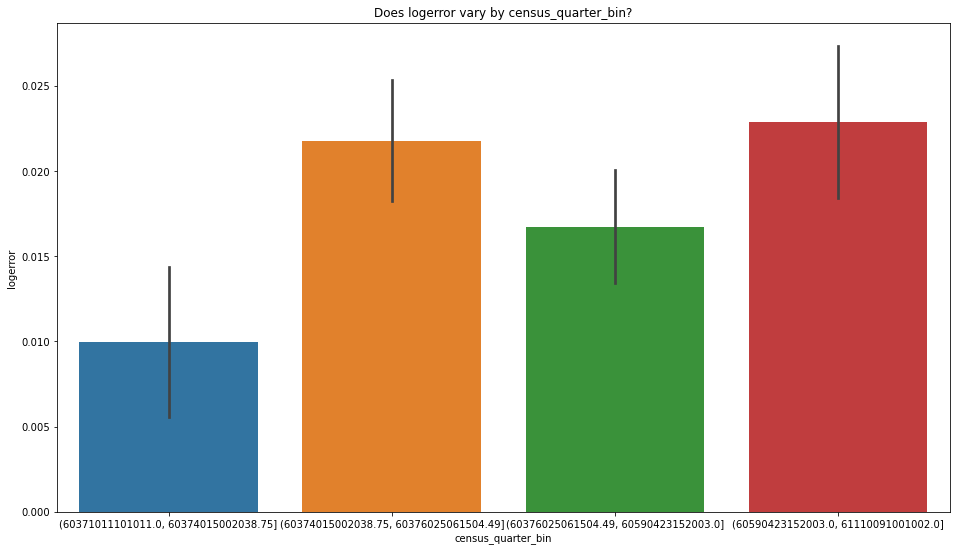

In [ ]:
train['census_quarter_bin'] = pd.qcut(train['censustractandblock'],q=4)

plt.figure(figsize=(16, 9))
sns.barplot(data = train, x='census_quarter_bin', y='logerror')
plt.title('Does logerror vary by census_quarter_bin?')
plt.show()